In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits.axes_grid1.parasite_axes import HostAxes

In [8]:
path = 'C:\\Users\\gamak\\Documents\\Papers\\Stars\\'
xr =pd.read_csv(path+'gaia_xstars_pm_r98_200pc_lkh10_woutdup.gzip')

In [9]:
xr = xr.sort_values('ML_FLUX_0', ascending=False)

In [5]:
x = xr.bp_rp # choose column X from table
y = xr.MG # choose column Y from table
x1 = xr.dist_pc
y1 = xr.ML_FLUX_0

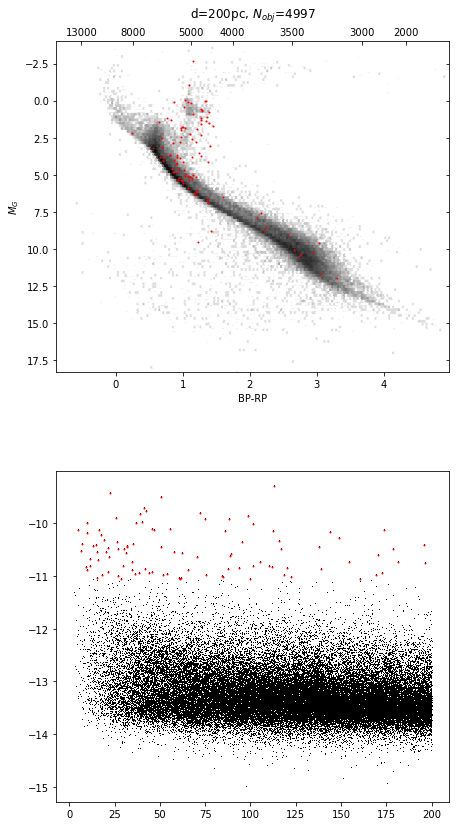

In [14]:
xmin = x.min() # margins of the plot
xmax = x.max()
ymin = y.min()
ymax = y.max()


fig, axs = plt.subplots(ncols=1, nrows=2, sharey=False, figsize=(6.5, 14),subplot_kw={'axes_class':HostAxes})
fig.subplots_adjust(hspace=0.3, left=0.15, right=0.99)
ax = axs[0]

hb = ax.hexbin(x, y, gridsize=200, bins='log', cmap='gray_r') # see info here 
# https://matplotlib.org/stable/gallery/statistics/hexbin_demo.html#sphx-glr-gallery-statistics-hexbin-demo-py
# and in help
ax.plot(x.iloc[:100],y.iloc[:100],'ro', markersize = 1)
ax.set(xlim=(xmin, xmax), ylim=(ymax, ymin), xlabel = 'BP-RP',ylabel = '$M_G$')
ax.set_title("d=200pc, $N_{obj}$=4997", y=1.05)

ax2 = ax.twin()  # ax2 is responsible for "top" axis and "right" axis
ax2.set_xticks([4.34, 3.68, 2.64, 1.745,1.117,.2575,-.5133])#,-0.1
ax2.set_xticklabels([2000,3000,3500,4000,5000,8000,13000])#,10000
ax2.tick_params(direction='in')
ax2.axis["right"].major_ticklabels.set_visible(False)
ax2.axis["top"].major_ticklabels.set_visible(True)

ax = axs[1]
ax.plot(x1,np.log10(y1),'k,')
ax.plot(x1.iloc[:100],np.log10(y1.iloc[:100]),'ro', markersize = 1)

plt.savefig(path+'!!!.eps')

In [7]:
tab = pd.read_csv(path+'100brightest_SIMBAD_SPT.csv')

In [40]:
del(tab['MG'])

In [56]:
tab['MG'] = np.array(xr.phot_g_mean_mag[:100]+5+5*(np.log10(xr.parallax[:100])-3))

In [63]:
tab.to_csv(path+'100brightest_SIMBAD_SPT.csv', index=None)

In [67]:
sum(1000/xr.parallax[:100]>60)

46

In [68]:
sum(tab.MG < 5)

65